In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
from our_mpeg import (
    compress_image,
    compress_image_with_reference,
    compress_image_with_dual_reference,
    decompress_image_with_dual_reference,
    decompress_image,
    load,
    loader
)

In [ ]:
example = load("/home/dashpole/Documents/lfv-compression/bottle.zip")

In [14]:
from our_mpeg import zigzag

In [15]:
import os
import gzip

def append_compressed(filename, im1_offsets, im1_residuals_q):
    with gzip.open(filename, 'ab+') as f:
        np.save(f, np.array(im1_offsets, dtype=np.int8))
        np.save(f, np.array(im1_residuals_q))
        
#     with gzip.open(filename, 'rb') as f:
#         a = np.load(f)
#         b = np.load(f)
#         print("ERROR", np.linalg.norm(a - np.array(im1_offsets)), a.dtype)
#         print("ERROR", np.linalg.norm(b - np.array(im1_residuals_q)), b.dtype)
#         print(f.name)

# Compression with no reference

In [ ]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0]):
    cur_img = example[t,0,0,:,:, :]

    a = compress_image(cur_img)
    with gzip.open(FILENAME, 'ab+') as f:
        np.save(f, np.array(a))

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

# Compression with prev as reference

In [ ]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0] - 1):
    next_img = example[t+1,0,0,:,:, :]
    prev_img = example[t,0,0,:,:,:]

    a, b = compress_image_with_reference(next_img, prev_img)
    append_compressed(FILENAME, a, b)

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

# Dual reference 

In [ ]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0] - 1):
    next_img = example[t+1,0,0,:,:, :]
    prev_img = example[t,0,0,:,:,:]
    prev_img_2 = example[t+1,1,0,:,:]

    a, b = compress_image_with_dual_reference(next_img, prev_img, prev_img_2, single_grid=2, double_grid=0)
    append_compressed(FILENAME, a, b)

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

In [6]:
from PIL import Image

In [12]:
next_img   = example[1,0,0,:,:,:]
prev_img   = example[0,0,0,:,:,:]
prev_img_2 = example[1,1,0,:,:,:]
a, b = compress_image_with_dual_reference(next_img, prev_img, prev_img_2, single_grid=2, double_grid=0)

In [13]:
im = decompress_image_with_dual_reference(a, b, prev_img, prev_img_2)

312.599


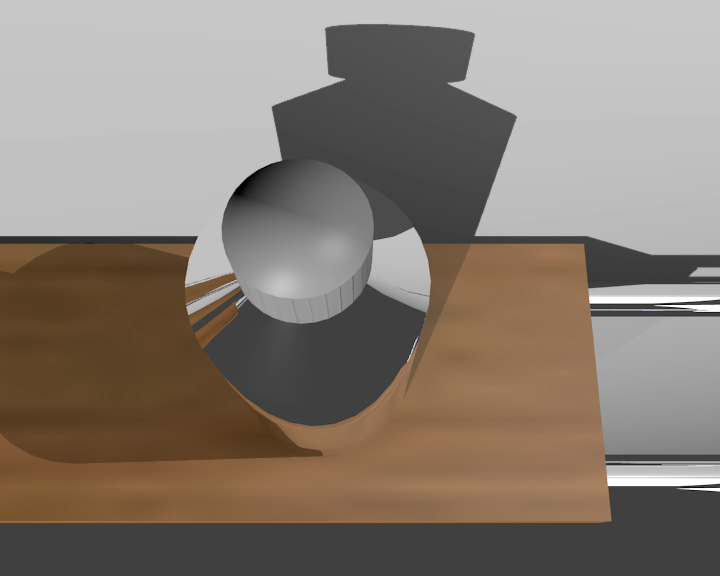

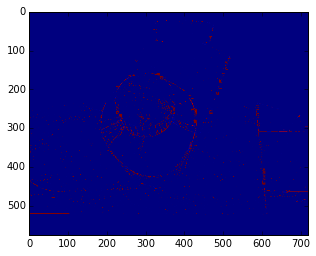

In [14]:
plt.imshow(im[:,:,0] - next_img[:,:,0])
print (np.linalg.norm(im[:,:,0].astype(np.float32) - next_img[:,:,0].astype(np.float32)))
Image.fromarray(im, "YCbCr").convert("RGB")

In [209]:
xxxx = compress_image(next_img)
im = decompress_image(xxxx)

# Car Compression

In [28]:
FILENAME = '/tmp/video.mp4.gz'
example = loader("/home/dashpole/Documents/lfv-compression/car.zip")
if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for time, current, prev, neighbor in example:

    a = compress_image(current)
    with gzip.open(FILENAME, 'ab+') as f:
        np.save(f, np.array(a))

    print("Time", time, "Size after zipping", os.path.getsize(FILENAME), flush=True)

Time 1 Size after zipping 133768
Time 2 Size after zipping 267466
Time 3 Size after zipping 401279
Time 4 Size after zipping 534972
Time 5 Size after zipping 668985
Time 6 Size after zipping 803100
Time 7 Size after zipping 937288
Time 8 Size after zipping 1071591
Time 9 Size after zipping 1206068
Time 10 Size after zipping 1341142
Time 11 Size after zipping 1476412
Time 12 Size after zipping 1612186
Time 13 Size after zipping 1747935
Time 14 Size after zipping 1884139
Time 15 Size after zipping 2020796
Time 16 Size after zipping 2157705
Time 17 Size after zipping 2294970
Time 18 Size after zipping 2433336
Time 19 Size after zipping 2572079
Time 20 Size after zipping 2710924
Time 21 Size after zipping 2850653
Time 22 Size after zipping 2991109
Time 23 Size after zipping 3131524
Time 24 Size after zipping 3272529
Time 25 Size after zipping 3414245
Time 26 Size after zipping 3556830
Time 27 Size after zipping 3700282
Time 28 Size after zipping 3845146
Time 29 Size after zipping 3990470
T

In [29]:
FILENAME = '/tmp/video.mp4.gz'
example = loader("/home/dashpole/Documents/lfv-compression/car.zip")
if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for time, current, prev, neighbor in example:

    a, b = compress_image_with_dual_reference(current, prev, neighbor, single_grid=2, double_grid=0)
    append_compressed(FILENAME, a, b)

    print("Image number", time, "Size after zipping", os.path.getsize(FILENAME), flush=True)

Image number 1 Size after zipping 2869
Image number 2 Size after zipping 6881
Image number 3 Size after zipping 12018
Image number 4 Size after zipping 18547
Image number 5 Size after zipping 25631
Image number 6 Size after zipping 32541
Image number 7 Size after zipping 38974
Image number 8 Size after zipping 46038
Image number 9 Size after zipping 54721
Image number 10 Size after zipping 64908
Image number 11 Size after zipping 75281
Image number 12 Size after zipping 84877
Image number 13 Size after zipping 93775
Image number 14 Size after zipping 102376
Image number 15 Size after zipping 111131
Image number 16 Size after zipping 120859
Image number 17 Size after zipping 131424
Image number 18 Size after zipping 142348
Image number 19 Size after zipping 153553
Image number 20 Size after zipping 170238
Image number 21 Size after zipping 186960
Image number 22 Size after zipping 203452
Image number 23 Size after zipping 219658
Image number 24 Size after zipping 235885
Image number 25 

In [30]:
FILENAME = '/tmp/video.mp4.gz'
example = loader("/home/dashpole/Documents/lfv-compression/car.zip")

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t, current, prev, neighbor in example:

    a, b = compress_image_with_reference(current, prev)
    append_compressed(FILENAME, a, b)

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

Timestep 1 Size after zipping 2759
Timestep 2 Size after zipping 6521
Timestep 3 Size after zipping 11145
Timestep 4 Size after zipping 16969
Timestep 5 Size after zipping 23272
Timestep 6 Size after zipping 29452
Timestep 7 Size after zipping 35373
Timestep 8 Size after zipping 41855
Timestep 9 Size after zipping 49603
Timestep 10 Size after zipping 58710
Timestep 11 Size after zipping 68003
Timestep 12 Size after zipping 76544
Timestep 13 Size after zipping 84192
Timestep 14 Size after zipping 91587
Timestep 15 Size after zipping 99208
Timestep 16 Size after zipping 107920
Timestep 17 Size after zipping 118116
Timestep 18 Size after zipping 129623
Timestep 19 Size after zipping 142488
Timestep 20 Size after zipping 156814
Timestep 21 Size after zipping 172319
Timestep 22 Size after zipping 189098
Timestep 23 Size after zipping 206777
Timestep 24 Size after zipping 225156
Timestep 25 Size after zipping 244466
Timestep 26 Size after zipping 264878
Timestep 27 Size after zipping 286029
